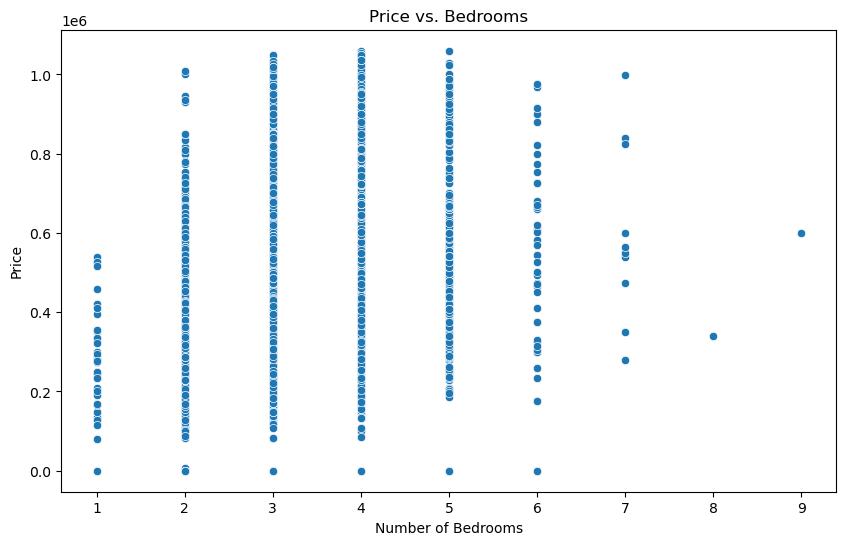

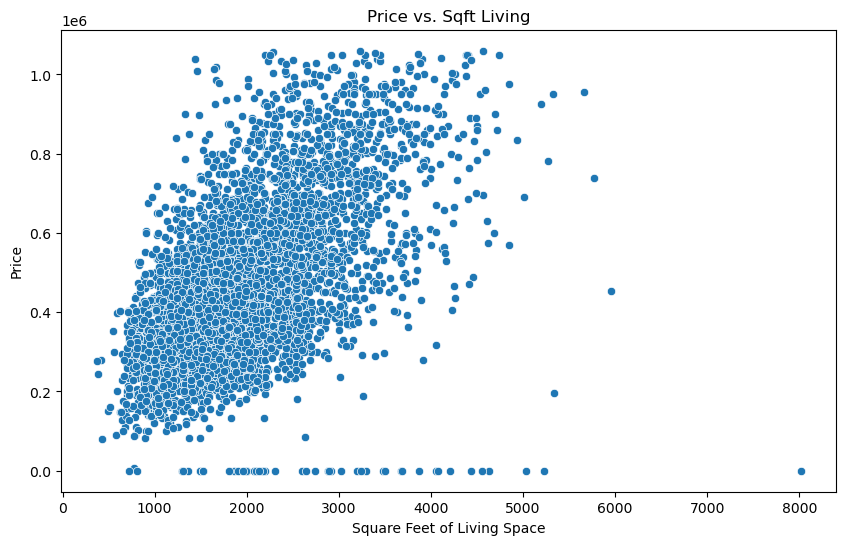

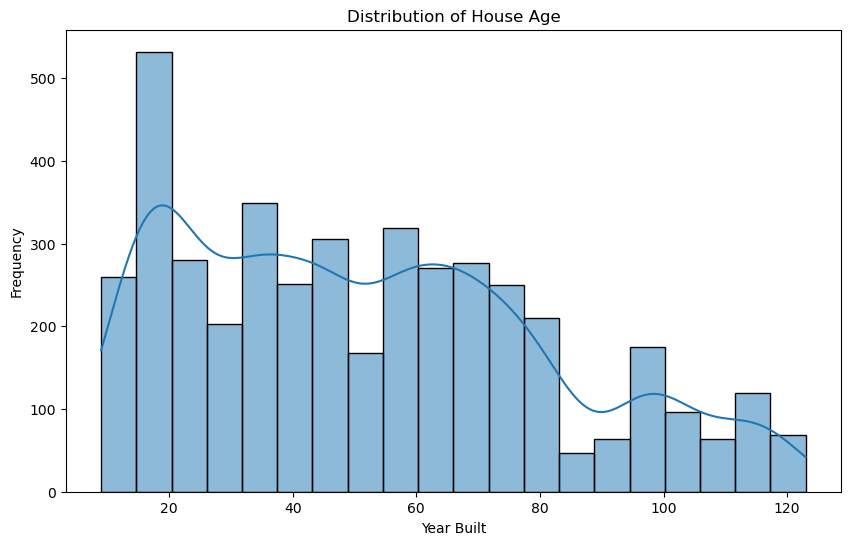

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'dataset/cleaned_data.csv'

# Load the dataset
data_fillmean = pd.read_csv(file_path)

# Scatter plot for Price vs Bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_fillmean, x='bedrooms', y='price')
plt.title('Price vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()



plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_fillmean, x='sqft_living', y='price')
plt.title('Price vs. Sqft Living')
plt.xlabel('Square Feet of Living Space')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_fillmean['house_age'], bins=20, kde=True)
plt.title('Distribution of House Age')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

# Convert date to datetime if not already done
data_fillmean['date'] = pd.to_datetime(data_fillmean['date'])
data_fillmean['year'] = data_fillmean['date'].dt.year





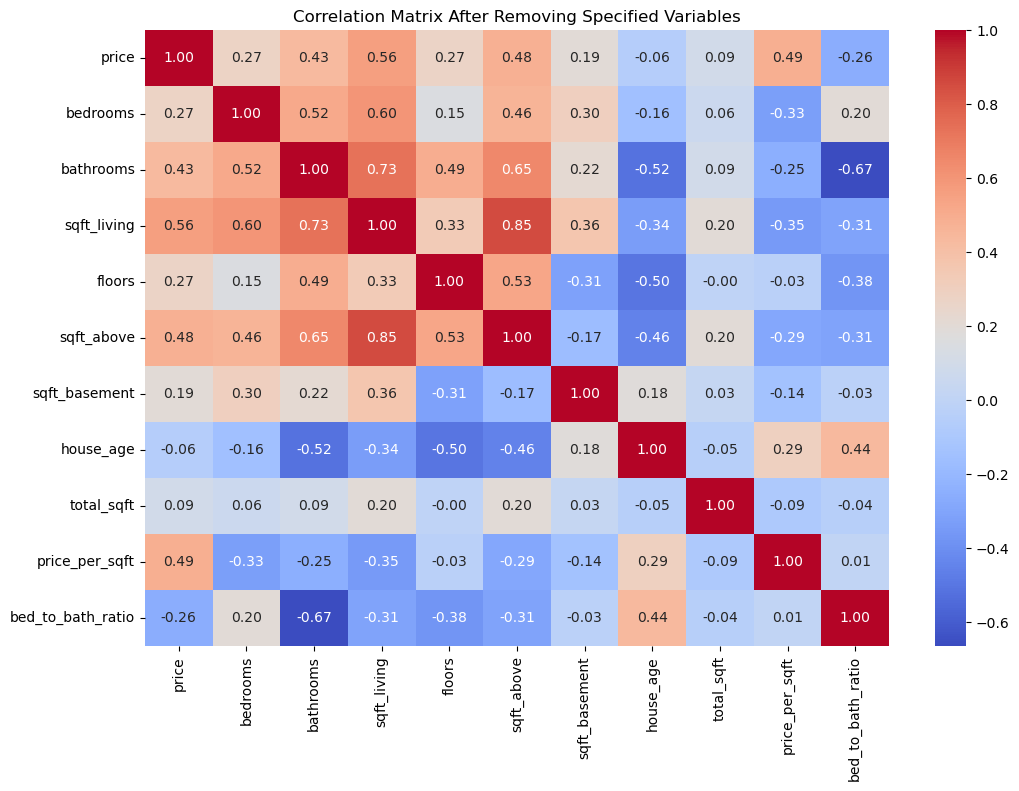

In [10]:
import numpy as np
# Drop non-numeric columns which cannot be used in correlation calculation
numeric_data = data_fillmean.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Removing Specified Variables')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardizing the features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)

# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principal_components = pca.fit_transform(numeric_scaled)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the PCA DataFrame
print(pca_df.head())


   Principal Component 1  Principal Component 2
0              -1.578310              -0.456063
1              -0.438257              -0.181584
2              -0.543152               1.091008
3               0.024364               1.170021
4              -3.424289              -1.207386


Explained Variance Ratio: [0.37645413 0.16349454]


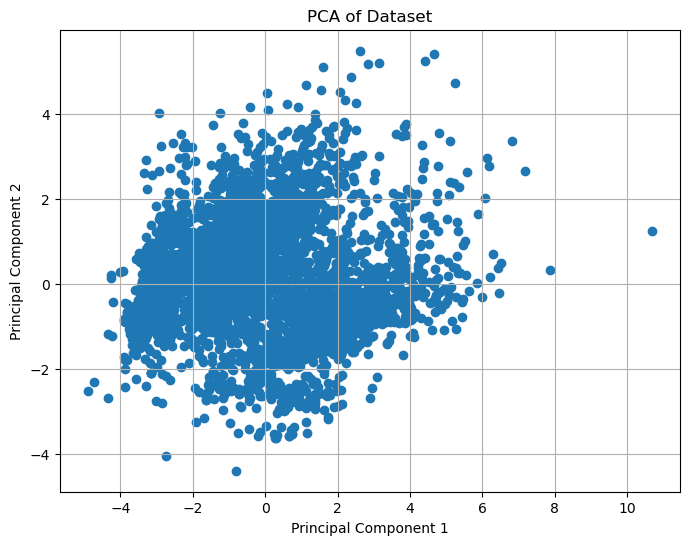

In [15]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

In [18]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data_fillmean' is already loaded and is your DataFrame
# Selecting the independent variables and the target variable
X = data_fillmean[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'floors']]
y = data_fillmean['price']

# Adding a constant to the model (the intercept)
X = sm.add_constant(X)

# Fitting the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Viewing the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     422.0
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        20:54:15   Log-Likelihood:                -58043.
No. Observations:                4307   AIC:                         1.161e+05
Df Residuals:                    4301   BIC:                         1.161e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.793e+05    1.2e+04     14.912      